# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [16]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 625


---

In [3]:
## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

# Set the API base URL
url = f'https://api.openweathermap.org/data/2.5/weather?'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'{url}&q={city}&appid={weather_api_key}'
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

 # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]


        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": (city_max_temp - 273),
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | airai
Processing Record 2 of Set 1 | keansburg
Processing Record 3 of Set 1 | normandin
Processing Record 4 of Set 1 | vaini
Processing Record 5 of Set 1 | mahebourg
Processing Record 6 of Set 1 | hermanus
Processing Record 7 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 8 of Set 1 | ushuaia
Processing Record 9 of Set 1 | busselton
Processing Record 10 of Set 1 | touros
Processing Record 11 of Set 1 | andenes
Processing Record 12 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 13 of Set 1 | georgetown
Processing Record 14 of Set 1 | mar del plata
Processing Record 15 of Set 1 | upernavik
Processing Record 16 of Set 1 | ust-nera
Processing Record 17 of Set 1 | castro
Processing Record 18 of Set 1 | fairbanks
Processing Record 19 of Set 1 | tual
Processing Record 20 of Set 1 | bilma
Processing Record 21 of Set 1 | hami
Processing Record 22 of Set 1 | torbay

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          572
Lat           572
Lng           572
Max Temp      572
Humidity      572
Cloudiness    572
Wind Speed    572
Country       572
Date          572
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,airai,-8.9266,125.4092,21.25,48,24,2.23,TL,1690683077
1,keansburg,40.4418,-74.1299,26.83,83,1,2.68,US,1690683077
2,normandin,48.8333,-72.5321,11.22,76,95,2.06,CA,1690683077
3,vaini,-21.2000,-175.2000,23.24,60,20,5.14,TO,1690683078
4,mahebourg,-20.4081,57.7000,22.51,78,40,4.12,MU,1690683078


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,airai,-8.9266,125.4092,21.25,48,24,2.23,TL,1690683077
1,keansburg,40.4418,-74.1299,26.83,83,1,2.68,US,1690683077
2,normandin,48.8333,-72.5321,11.22,76,95,2.06,CA,1690683077
3,vaini,-21.2000,-175.2000,23.24,60,20,5.14,TO,1690683078
4,mahebourg,-20.4081,57.7000,22.51,78,40,4.12,MU,1690683078


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

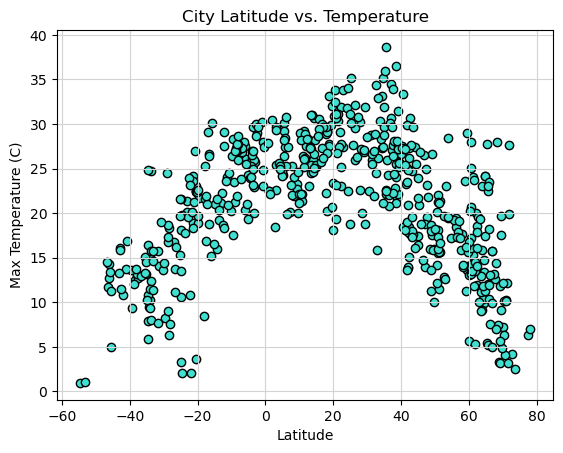

In [8]:
# Build scatter plot for latitude vs. temperature
lats_scats = city_data_df['Lat']
temps_scats = city_data_df['Max Temp']
plt.scatter(x=lats_scats, y=temps_scats, c='turquoise', edgecolors='black')
plt.grid(color='lightgray', linestyle='-')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title('City Latitude vs. Temperature')

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

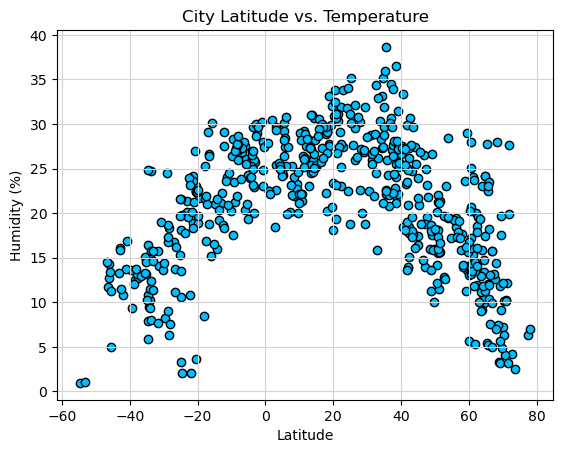

In [9]:
# Build the scatter plots for latitude vs. humidity
lats_scats = city_data_df['Lat']
humid_scats = city_data_df['Humidity']
plt.scatter(x=lats_scats, y=temps_scats, c='deepskyblue', edgecolors='black')
plt.grid(color='lightgray', linestyle='-')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs. Temperature')

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

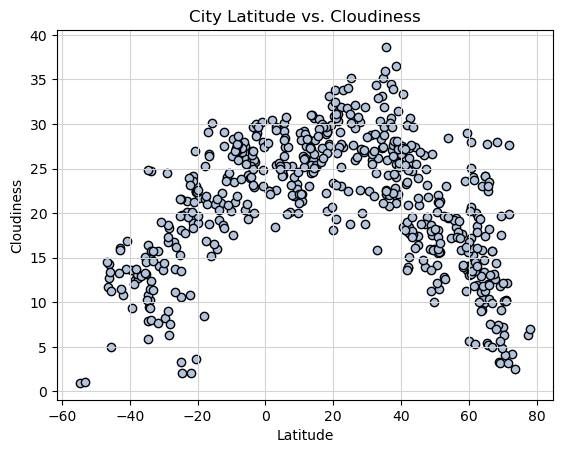

In [10]:
# Build the scatter plots for latitude vs. cloudiness
lats_scats = city_data_df['Lat']
cloud_scats = city_data_df['Cloudiness']
plt.scatter(x=lats_scats, y=temps_scats, c='lightsteelblue', edgecolors='black')
plt.grid(color='lightgray', linestyle='-')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('City Latitude vs. Cloudiness')

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

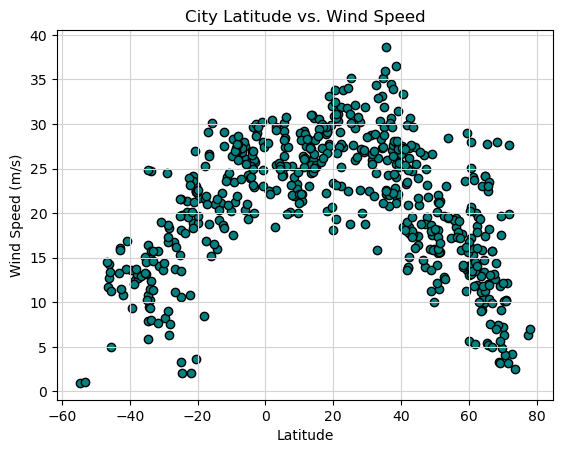

In [11]:
# Build the scatter plots for latitude vs. wind speed
lats_scats = city_data_df['Lat']
wind_scats = city_data_df['Wind Speed']
plt.scatter(x=lats_scats, y=temps_scats, c='teal', edgecolors='black')
plt.grid(color='lightgray', linestyle='-')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title('City Latitude vs. Wind Speed')

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [48]:
# Define a function to create Linear Regression plots
#x_values = ''
#y_values = ''

def LinearRegression(x_values, y_values, x_label, y_label, hemisphere):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
    x_min, x_max = min(x_values), max(x_values)
    y_min, y_max = min(y_values), max(y_values)
    x_pos = x_min + 0.6 * (x_max - x_min)
    y_pos = y_min + 0.1 * (y_max - y_min)
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq, (x_pos, y_pos), fontsize=15, color="red")
    plt.title(f"{hemisphere} Hemisphere - {x_label} vs {y_label}", fontsize=15)
    plt.xlabel(x_label, fontsize=14)
    plt.ylabel(y_label, fontsize=14)
    print(f"The correlation coefficient between {x_label} and {y_label} is {round(st.pearsonr(x_values, y_values)[0], 2)}")
    print(f"The r-squared is: {rvalue**2}")
    plt.show()

In [49]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,keansburg,40.4418,-74.1299,26.83,83,1,2.68,US,1690683077
2,normandin,48.8333,-72.5321,11.22,76,95,2.06,CA,1690683077
9,andenes,69.3143,16.1194,11.78,82,100,5.66,NO,1690683079
10,georgetown,5.4112,100.3354,30.12,79,20,1.54,MY,1690683001
12,upernavik,72.7868,-56.1549,4.21,87,35,1.18,GL,1690683080


In [50]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,airai,-8.9266,125.4092,21.25,48,24,2.23,TL,1690683077
3,vaini,-21.2000,-175.2000,23.24,60,20,5.14,TO,1690683078
4,mahebourg,-20.4081,57.7000,22.51,78,40,4.12,MU,1690683078
5,hermanus,-34.4187,19.2345,9.48,71,67,7.62,ZA,1690683078
6,ushuaia,-54.8000,-68.3000,0.96,60,40,10.29,AR,1690683078


###  Temperature vs. Latitude Linear Regression Plot

The correlation coefficient between Latitude and Max Temp (F) is -0.68
The r-squared is: 0.45582410996850115


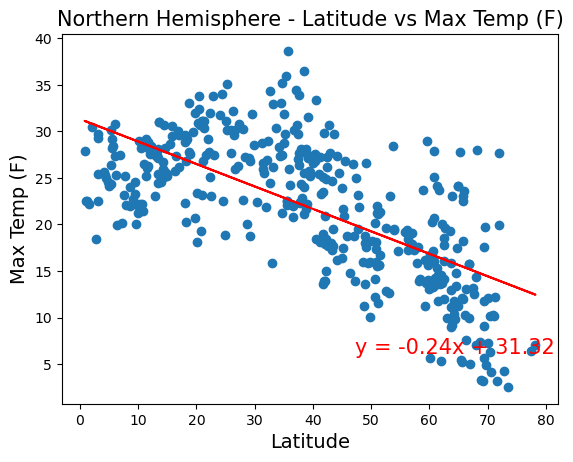

In [51]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']

LinearRegression(x_values, y_values, "Latitude", "Max Temp (F)", "Northern")

The correlation coefficient between Latitude and Max Temp (F) is 0.76
The r-squared is: 0.573701616409703


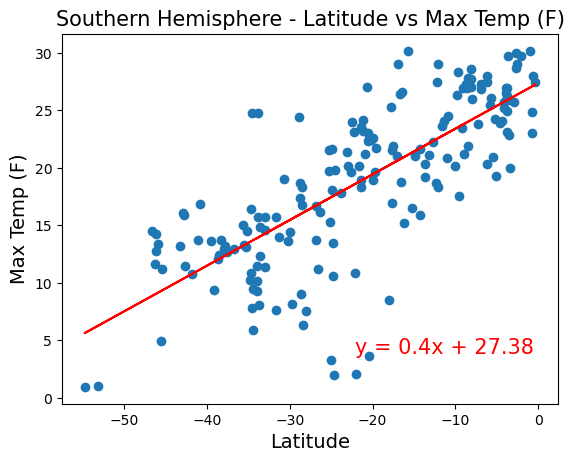

In [52]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']

LinearRegression(x_values, y_values, "Latitude", "Max Temp (F)", "Southern")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The correlation coefficient between Latitude and Humidity is -0.01
The r-squared is: 9.771460544433406e-05


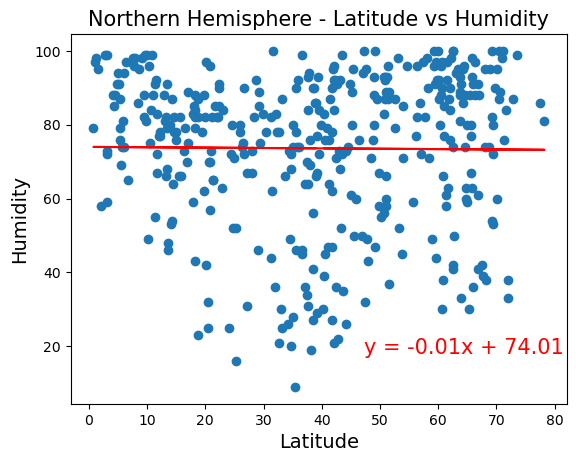

In [53]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']

LinearRegression(x_values, y_values, "Latitude", "Humidity", "Northern")

The correlation coefficient between Latitude and Humidity is -0.01
The r-squared is: 5.658691714413326e-05


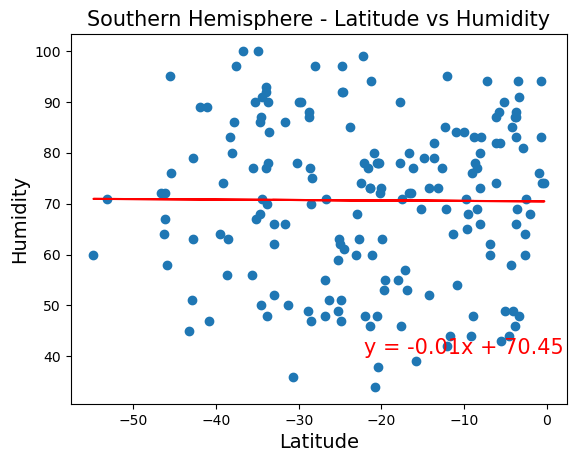

In [54]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']

LinearRegression(x_values, y_values, "Latitude", "Humidity", "Southern")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The correlation coefficient between Latitude and Cloudiness is 0.01
The r-squared is: 5.613646442055368e-05


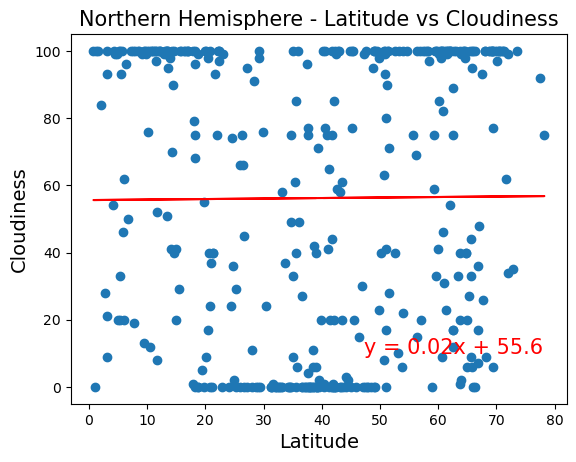

In [55]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']

LinearRegression(x_values, y_values, "Latitude", "Cloudiness", "Northern")

The correlation coefficient between Latitude and Cloudiness is -0.05
The r-squared is: 0.002298712013948108


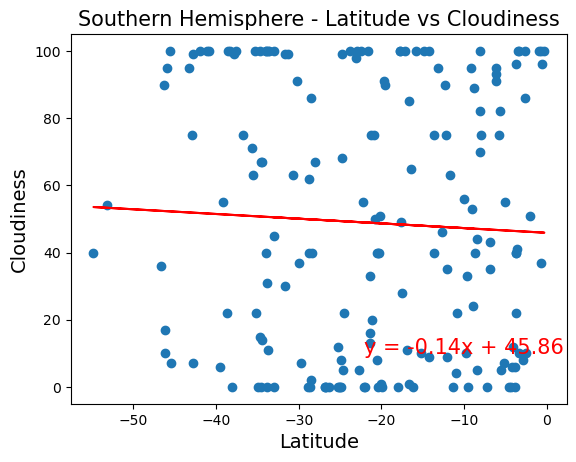

In [56]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']

LinearRegression(x_values, y_values, "Latitude", "Cloudiness", "Southern")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The correlation coefficient between Latitude and Wind Speed is -0.05
The r-squared is: 0.002160731545492206


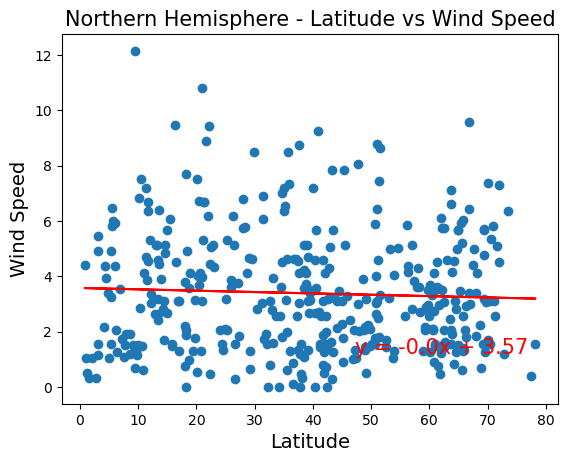

In [57]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']

LinearRegression(x_values, y_values, "Latitude", "Wind Speed", "Northern")

The correlation coefficient between Latitude and Wind Speed is -0.27
The r-squared is: 0.07268920284387337


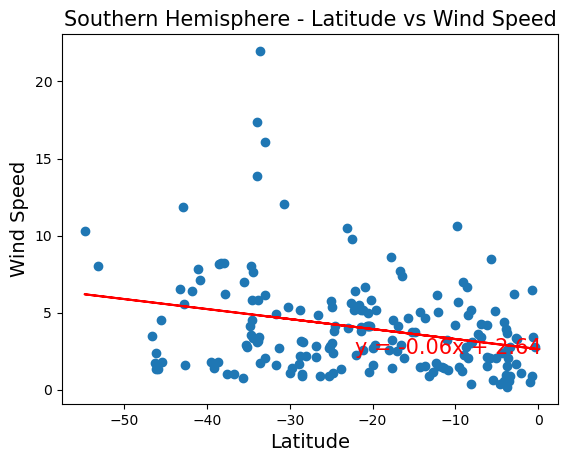

In [58]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']

LinearRegression(x_values, y_values, "Latitude", "Wind Speed", "Southern")

**Discussion about the linear relationship:** YOUR RESPONSE HERE